In [7]:
from functools import partial
import matplotlib.pyplot as plt
from teyssier.sedov import sedovana
from superfv import EulerSolver, initial_conditions, plot_1d_slice, plot_2d_slice

In [8]:
N = 64
T = 0.8
gamma = 1.4

sim = EulerSolver(
    ic=partial(initial_conditions.sedov, gamma=gamma, h=1 / N, P0=1e-5),
    bcx=("reflective", "free"),
    bcy=("reflective", "free"),
    gamma=gamma,
    riemann_solver="hllc",
    CFL=0.8,
    nx=N,
    ny=N,
    p=3,
    flux_recipe=2,
    ZS=True,
    GL=True,
    PAD={"rho": (0, None), "P": (0, None)},
)

In [9]:
sim.run(T)

Step #1120 @ t=8.00e-01 | dt=3.20e-05 | min(rho)=2.51e-03, min(P)=-1.20e-03 | (done)                


In [10]:
dim = 2
E0 = 1
rho0 = 1

r, d, u, P = sedovana(gamma, dim)

r *= (E0 / rho0) ** (1.0 / (dim + 2)) * T ** (2 / (dim + 2))
d *= rho0
u *= (E0 / rho0) ** (1.0 / (dim + 2)) * T ** (-dim / (dim + 2))
P *= (E0 / rho0) ** (2.0 / (dim + 2)) * T ** (-2 * dim / (dim + 2)) * rho0

chi0=np.float64(1.0018778777154949)


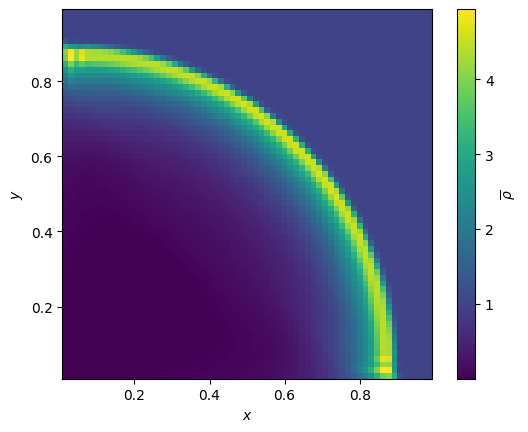

In [21]:
fig, ax = plt.subplots()

plot_2d_slice(
    sim,
    ax,
    "rho",
    cell_averaged=True,
)

# add colorbar
cbar = plt.colorbar(ax.images[0], ax=ax)
cbar.set_label(r"$\overline{\rho}$")

/Users/jonathan/Desktop/superfv/superfv/visualization.py:32: UserWarning: Cell-centered coordinate 0 not exactly matched in mesh; using nearest: 0.0078125
  warnings.warn(


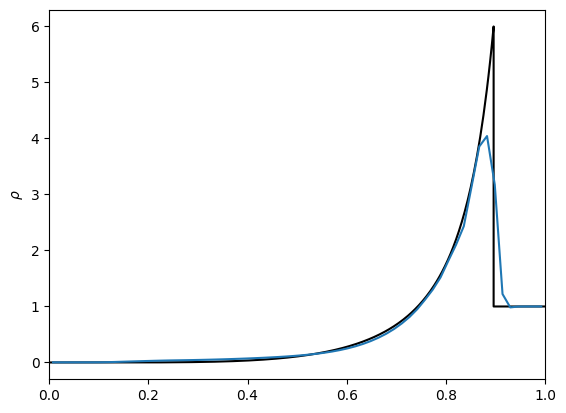

In [22]:
fig, ax = plt.subplots()

ax.set_xlim(0, 1)
ax.set_ylabel(r"$\rho$")

ax.plot(r, d, label="analytic", color="black")
plot_1d_slice(sim, ax, "rho", y=0, label="superfv")

In [13]:
sim.print_timings()

Routine                      # of calls  Total time (s) % time
---------------------------  ----------  --------------  ------
wall                                  1          170.03   100.0
take_step                          1120          169.93    99.9
compute_dt                         1120            0.24     0.1
apply_bc                           4482            0.51     0.3
riemann_solver                     8960           57.31    33.7
zhang_shu_limiter                  4480           56.64    33.3
MOOD_loop                             0               -       -
      detect_troubled_cells           0               -       -
      revise_fluxes                   0               -       -
snapshot                              2            0.01     0.0
minisnapshot                       1121            0.07     0.0
